In [1]:
import pandas as pd

# Opération 2 = Stats sur les glossateurs du manuscrit. Suivre le mouvement de la confection du manuscrit. On commence avec l'importation du fichier csv.

In [2]:
VL41 = pd.read_csv("Glosses_VossLat041_Latin 14087.csv")
VL41.head()

,Lt,Le,Tl,Gm,Gi,Gnorm,folio,line,Lorder,Mg,Temp,Loc,Forme,Sens,grammatical terminology (Schad),Notes divers,Lat.14087
0,INCIPIT LIBER EUTI/GRAMMAT(I)CI CI/DE UERBO,NaN,NaN,++++/de uer[bo] ++++/nus contextor,NaN,NaN,2r,0,NaN,C,T3,P1 en haut à droite,F4,S523,NaN,"contextio, weaving (also fig. of other structu...",NaN
1,cum semper,semper,NaN,NaN,s cũ frequentia,scilicet cum frequentia,2r,1,a,B,T2,P0,F3,S22,NaN,"*cum superfluitate, cum est superflu ?",NaN
2,noues quaestiones,quaestiones,NaN,NaN,novẽ int̃rogaciones,noues interogationes,2r,1,b,B,T2,P0,F3,S22,NaN,NaN,NaN
3,doctorib;,doctoribus,NaN,NaN,p̃ce++++++,preceptoribus,2r,1,c,A,T1,P0,F2,S22,NaN,NaN,Preceptor. doctor ł magifter
4,auditorum,NaN,NaN,NaN,iđ discipulorũ,id est discipulorum,2r,2,a,A,T1,P0,F2,S22,NaN,*+ adiutorum ?,NaN


In [3]:
VL41["Mg"].value_counts() #Je compte les différentes mains pour vérifier qu'il n'y a pas de doublons

A     456
B     344
C     131
AB     53
3      48
m0     22
D       8
E       3
Name: Mg, dtype: int64

In [4]:
df_folio_mains = VL41[["folio", "Mg"]] #Je crée un sousdataframe avec les mains et les folios, sc. les infos qui nous importent
df_folio_mains = df_folio_mains.dropna(axis=0)
df_folio_mains.head

<bound method NDFrame.head of      folio Mg
0       2r  C
1       2r  B
2       2r  B
3       2r  A
4       2r  A
...    ... ..
1061   22r  3
1062   22r  3
1063   22r  3
1064   22v  3
1065   22v  3

[1064 rows x 2 columns]>

In [5]:
foliolist = []
for val in df_folio_mains.folio:
    if val not in foliolist:
        foliolist.append(val)
print(len(foliolist), foliolist)

42 ['2r', '2v', '3r', '3v', '4r', '4v', '5r', '5v', '6r', '6v', '7r', '7v', '8r', '8v', '9r', '9v', '10r', '10v', '11r', '11v', '12r', '12v', '21f', '13r', '13v', '14r', '14v', '15r', '15v', '16r', '16v', '17r', '18r', '18v', '19r', '19v', '20r', '20v', '21r', '21v', '22r', '22v']


In [6]:
listdico = [] # on initialise une liste vide pour les mains

for folio in foliolist:
    
    sub_df = df_folio_mains.loc[df_folio_mains['folio'] == folio] # un sous dataframe avec chaque main dans un folio

    a = sub_df['Mg'].value_counts() # série avec le nb de chaque main occurence
    
    
    folio_hands = dict(a) # de séries en dico
    
    listdico.append(folio_hands) # append le dico à la liste

df_folio_mains_final = pd.DataFrame(listdico, index=foliolist) # colonnes= occurences des mains, lignes= folios
df_folio_mains_final

,B,A,C,m0,AB,3,D,E
2r,33.0,11.0,3.0,1.0,NaN,NaN,NaN,NaN
2v,22.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN
3r,24.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
3v,18.0,8.0,16.0,7.0,NaN,NaN,NaN,NaN
4r,38.0,4.0,10.0,1.0,NaN,NaN,NaN,NaN
4v,15.0,7.0,17.0,6.0,NaN,NaN,NaN,NaN
5r,5.0,18.0,21.0,2.0,NaN,NaN,NaN,NaN
5v,12.0,7.0,4.0,3.0,NaN,NaN,NaN,NaN
6r,3.0,28.0,17.0,NaN,15.0,6.0,NaN,NaN
6v,16.0,13.0,9.0,NaN,7.0,NaN,NaN,NaN


In [7]:
df_folio_mains_final = df_folio_mains_final.fillna(0) # remplacer NaN valeur (quand a main ne contribute pas à un folio) par zero
df_folio_mains_final

,B,A,C,m0,AB,3,D,E
2r,33.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0
2v,22.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0
3r,24.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3v,18.0,8.0,16.0,7.0,0.0,0.0,0.0,0.0
4r,38.0,4.0,10.0,1.0,0.0,0.0,0.0,0.0
4v,15.0,7.0,17.0,6.0,0.0,0.0,0.0,0.0
5r,5.0,18.0,21.0,2.0,0.0,0.0,0.0,0.0
5v,12.0,7.0,4.0,3.0,0.0,0.0,0.0,0.0
6r,3.0,28.0,17.0,0.0,15.0,6.0,0.0,0.0
6v,16.0,13.0,9.0,0.0,7.0,0.0,0.0,0.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

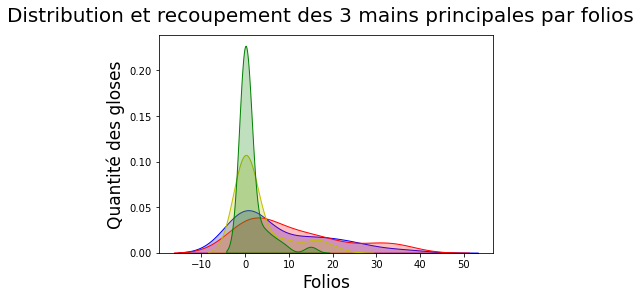

In [9]:
#L'echelle ne correspond pas à mes données(???). Je veux 0:45 pour x et 0:65 pour y

#ax = plt.gca()
#ax.set_xlim(1, 45)
#ax.set_ylim(1, 65)

fig = sns.kdeplot(df_folio_mains_final['B'], shade=True, color="b") 
fig = sns.kdeplot(df_folio_mains_final['A'], shade=True, color="r")
fig = sns.kdeplot(df_folio_mains_final['C'], shade=True, color="y")
fig = sns.kdeplot(df_folio_mains_final['AB'], shade=True, color="g")

fig.figure.suptitle("Distribution et recoupement des 3 mains principales par folios", fontsize = 20)

                  
plt.xlabel('Folios', fontsize=17)
plt.ylabel('Quantité des gloses', fontsize=17)
plt.show()

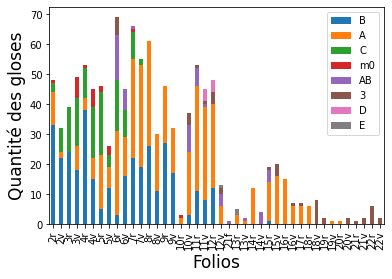

In [10]:
df_folio_mains_final.plot(kind='bar', stacked=True) #Ça doit le faire 
plt.xlabel('Folios', fontsize=17) 
plt.ylabel('Quantité des gloses', fontsize=17)
plt.savefig('stacked_barplot_hands_folios.png')

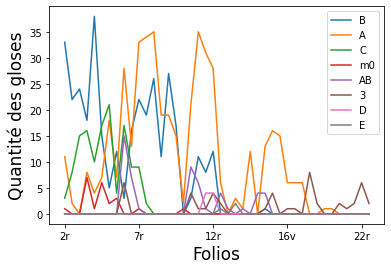

In [11]:
ax = plt.gca() 
for hand in df_folio_mains_final.columns: # for each hand 
    # plot a line using folio as x_value and hand as y_value
    df_folio_mains_final.plot(kind='line',use_index=True, y=str(hand),ax=ax)
    # different color are automaticaly given
plt.xlabel('Folios', fontsize=17)
plt.ylabel('Quantité des gloses', fontsize=17)
plt.savefig('line_plot_hands_folios.png')
plt.show()

# Visualisation du types des gloses par main.. Quel type de glose est privilegié et par quel main? Qu'est-ce qu'on peut en déduire sur le rôle de chaque main? 

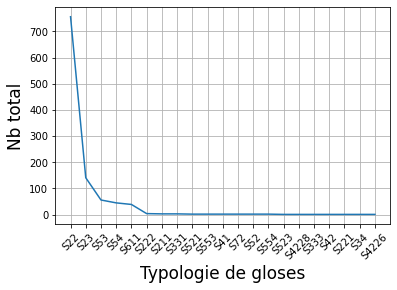

In [12]:
plt.plot(VL41["Sens"].value_counts()) #quel type de Sens est privilegié
plt.xticks(rotation = 45) #pourquoi ça marche pas?
plt.grid()
plt.xlabel('Typologie de gloses', fontsize=17)
plt.ylabel('Nb total', fontsize=17)
plt.savefig('typologie_privilegiee.png')


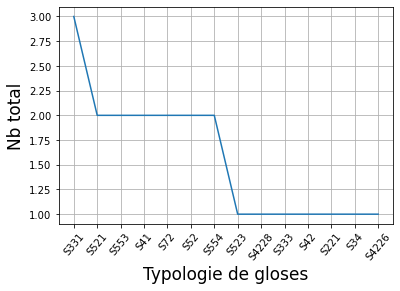

In [13]:
plt.plot(VL41["Sens"].value_counts()[7:24]) #zoom in 
plt.xticks(rotation = 50)
plt.xlabel('Typologie de gloses', fontsize=17)
plt.ylabel('Nb total', fontsize=17)
plt.grid()
plt.savefig('typologie_privilegiee_zoom_end.png')


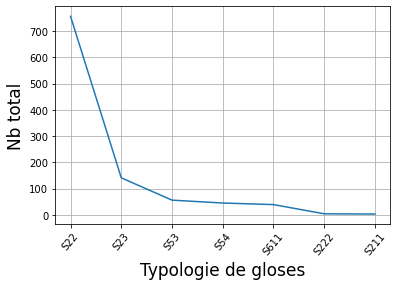

In [14]:
plt.plot(VL41["Sens"].value_counts()[0:7]) #zoom in 
plt.xticks(rotation = 50)
plt.xlabel('Typologie de gloses', fontsize=17)
plt.ylabel('Nb total', fontsize=17)
plt.grid()
plt.savefig('typologie_privilegiee_zoom_beginning.png')


# C'est quand je veux afficher le type des gloses en fonction des mains que ça devient compliqué...

In [15]:
df_typologie = VL41[["folio","Mg", "Sens"]] 
#un subset avec Lt=lemmas, Gm = Glosses en marge, Gi= Glosses interlinéaires, folio,
#Mg= MaindeGlossateur, Loc= en marge ou en interligne, Forme = signe, mot, syntagme ou phrase
#Sens = type de glose
df_typologie = df_typologie.dropna(axis=0) #function strip for spaces
df_typologie.head

<bound method NDFrame.head of      folio Mg  Sens
0       2r  C  S523
1       2r  B   S22
2       2r  B   S22
3       2r  A   S22
4       2r  A   S22
...    ... ..   ...
1061   22r  3  S611
1062   22r  3  S611
1063   22r  3  S611
1064   22v  3   S22
1065   22v  3  S611

[1057 rows x 3 columns]>

In [16]:
handlist = []
for hand in df_typologie.Mg:
    if hand not in handlist:
        handlist.append(hand)
print(len(handlist), handlist)

8 ['C', 'B', 'A', 'm0', 'AB', '3', 'D', 'E']


In [17]:
list_dico = [] # make an empty list for all hands in each folio

for hand in handlist:
    
    sub_df = df_typologie.loc[df_typologie["Mg"] == hand] # a sub data frame with all hand in a folio
    
    s = sub_df["Sens"].value_counts() # a panda series of the number of each hand occurence
    
    types_hands = dict(s) # change series to dictionary object
    
    
    list_dico.append(types_hands) # append the dict on the list

df_typologie_final = pd.DataFrame(list_dico, index = handlist) # make a df with hands occurences as columns and folios as index
df_typologie_final

,S22,S53,S23,S54,S523,S211,S222,S333,S611,S221,...,S521,S34,S52,S4228,S4226,S41,S553,S42,S72,S331
C,93,16.0,9.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,252,20.0,35.0,13.0,NaN,1.0,1.0,NaN,7.0,NaN,...,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
A,319,12.0,88.0,24.0,NaN,NaN,2.0,NaN,4.0,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0
m0,7,4.0,1.0,NaN,NaN,1.0,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB,38,3.0,3.0,2.0,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,36,NaN,4.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
D,7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#c'est ce dataframe idéalement que je veux ploter.
df_typologie_final = df_typologie_final.fillna(0) # replace NaN value (when a hand does not write on a folio) by zero
df_typologie_final = df_typologie_final.T
df_typologie_final

,C,B,A,m0,AB,3,D,E
S22,93.0,252.0,319.0,7.0,38.0,36.0,7.0,3.0
S53,16.0,20.0,12.0,4.0,3.0,0.0,0.0,0.0
S23,9.0,35.0,88.0,1.0,3.0,4.0,1.0,0.0
S54,6.0,13.0,24.0,0.0,2.0,0.0,0.0,0.0
S523,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S211,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
S222,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
S333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S611,1.0,7.0,4.0,9.0,6.0,6.0,0.0,0.0
S221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


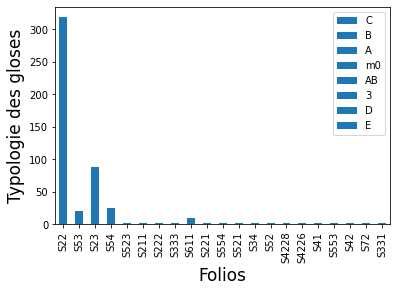

In [19]:
ax = plt.gca() 
for hand in df_typologie_final.columns: # for each hand 
    # plot a line using type as x_value and hand as y_value
    df_typologie_final.plot(kind='bar', stacked=True, use_index=True, y=str(hand),ax=ax)
plt.xlabel('Folios', fontsize=17)
plt.ylabel('Typologie des gloses', fontsize=17)
plt.savefig('typologie_mains.png')
plt.show()

# Approche #2

In [20]:
df_typologie_final_index = df_typologie_final.reset_index() # pour créer une colonne propre de la typologie
df_typologie_final_index

,index,C,B,A,m0,AB,3,D,E
0,S22,93.0,252.0,319.0,7.0,38.0,36.0,7.0,3.0
1,S53,16.0,20.0,12.0,4.0,3.0,0.0,0.0,0.0
2,S23,9.0,35.0,88.0,1.0,3.0,4.0,1.0,0.0
3,S54,6.0,13.0,24.0,0.0,2.0,0.0,0.0,0.0
4,S523,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,S211,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,S222,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
7,S333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,S611,1.0,7.0,4.0,9.0,6.0,6.0,0.0,0.0
9,S221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([<AxesSubplot:title={'center':'3'}, xlabel='index'>,
       <AxesSubplot:title={'center':'A'}, xlabel='index'>,
       <AxesSubplot:title={'center':'AB'}, xlabel='index'>,
       <AxesSubplot:title={'center':'B'}, xlabel='index'>,
       <AxesSubplot:title={'center':'C'}, xlabel='index'>,
       <AxesSubplot:title={'center':'D'}, xlabel='index'>,
       <AxesSubplot:title={'center':'E'}, xlabel='index'>, <AxesSubplot:>],
      dtype=object)

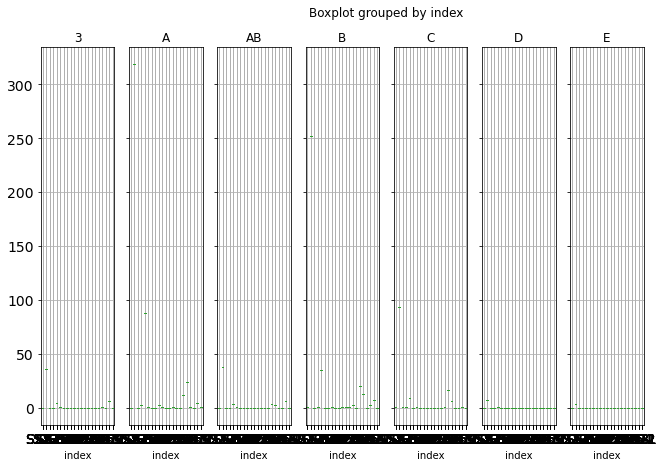

In [21]:
#On essaye avec les boîtes à moustache mais j'ai trop de variables pour les visualiser
df_typologie_final_index.boxplot(column=['3','A','AB','B','C','D','E'],by='index', figsize=(12,7), layout=(1,8), fontsize=14) 

In [22]:
df_typologie_final_index.groupby(["index"]).describe() #inutile?

C                                             B         ...    D  \
      count  mean std   min   25%   50%   75%   max count   mean  ...  75%   
index                                                             ...        
S211    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...  0.0   
S22     1.0  93.0 NaN  93.0  93.0  93.0  93.0  93.0   1.0  252.0  ...  7.0   
S221    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    0.0  ...  0.0   
S222    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...  0.0   
S23     1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0   1.0   35.0  ...  1.0   
S331    1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...  0.0   
S333    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    0.0  ...  0.0   
S34     1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    1.0  ...  0.0   
S41     1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...  0.0   
S42     1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...  0.0   
S4226   1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    1.0  ...  0.0   
S4228   1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    1.0  ...  0.0   
S52     1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    1.0  ...  0.0   
S521    1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    2.0  ...  0.0   
S523    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    0.0  ...  0.0   
S53     1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   1.0   20.0  ...  0.0   
S54     1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0   1.0   13.0  ...  0.0   
S553    1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...  0.0   
S554    1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    2.0  ...  0.0   
S611    1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0    7.0  ...  0.0   
S72     1.0   0.0 NaN   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...  0.0   

               E                                    
       max count mean std  min  25%  50%  75%  max  
index                                               
S211   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S22    7.0   1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0  
S221   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S222   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S23    1.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S331   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S333   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S34    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S41    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S42    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S4226  0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S4228  0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S52    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S521   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S523   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S53    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S54    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S553   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S554   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S611   0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
S72    0.0   1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  

[21 rows x 64 columns]

<AxesSubplot:>

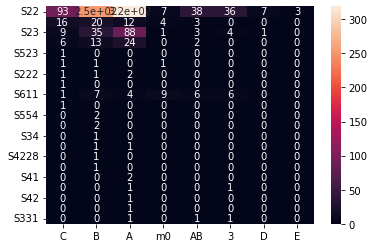

In [23]:
sns.heatmap(df_typologie_final, annot=True) #Ni beau, ni interpretable

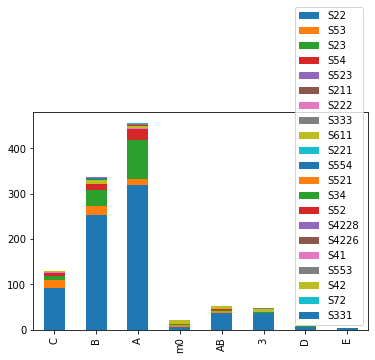

In [30]:
df_typologie_final.T.plot(kind='bar', stacked = True) #passable????
plt.savefig('mains_typologie_stackedbar.png')


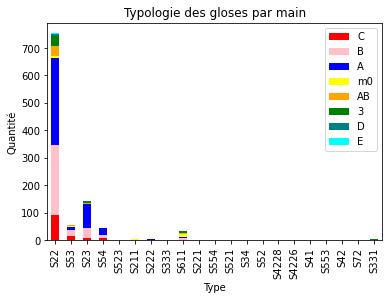

In [31]:
import seaborn as sns #les petites valeurs et par conséquent les plus interessantes se perdent completement
  
df_typologie_final.plot(kind='bar', stacked=True, color=['red', 'pink','blue','yellow', 'orange', 'green', 'teal', 'aqua','lime', 'brown', 'gold' ,'magenta', 'palegreen','navy', 'yellowgreen','slategrey', 'deeppink','cadetblue'])

# Add Title and Labels
plt.title('Typologie des gloses par main')
plt.xlabel('Type')
plt.ylabel('Quantité')
plt.savefig('typologie_mains_stackedbar.png')


In [27]:
typelist = []
for type in df_typologie.Sens:
    if type not in typelist:
        typelist.append(type)
print(len(typelist), typelist)

21 ['S523', 'S22', 'S23', 'S553', 'S54', 'S53', 'S211', 'S611', 'S222', 'S34', 'S333', 'S41', 'S331', 'S221', 'S52', 'S554', 'S42', 'S521', 'S72', 'S4228', 'S4226']


/home/mat/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


NameError: name 'self' is not defined

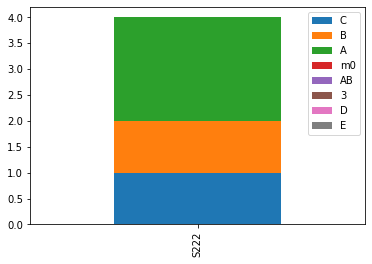

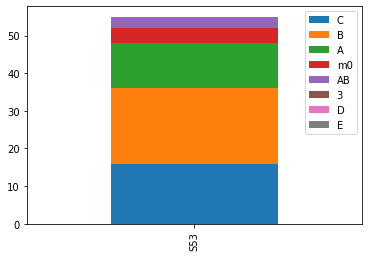

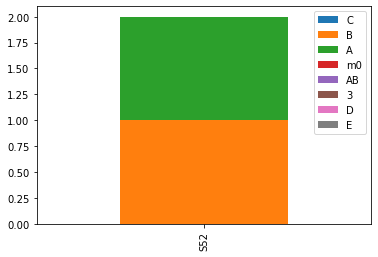

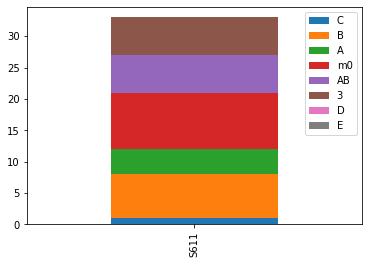

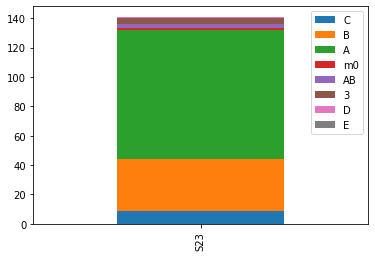

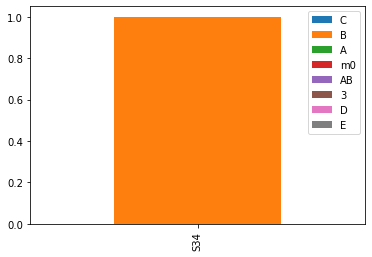

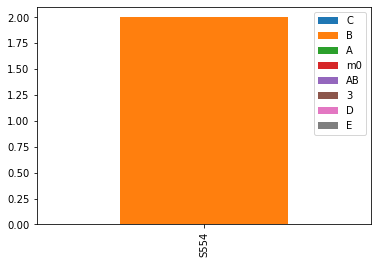

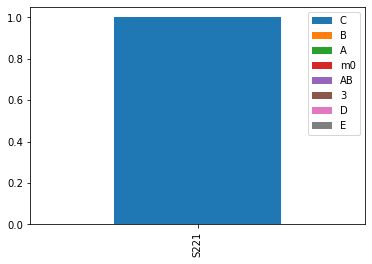

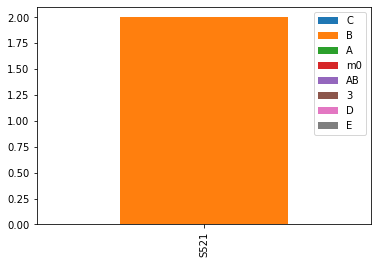

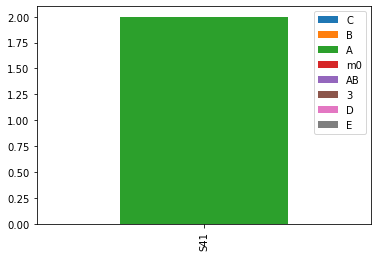

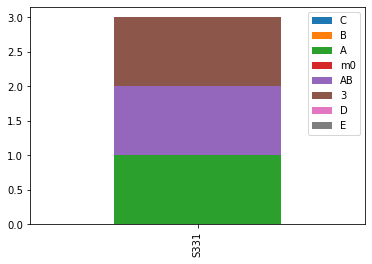

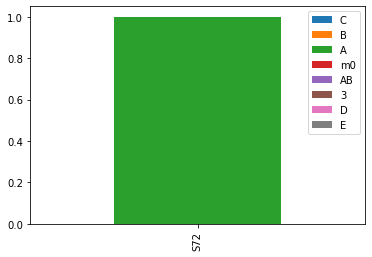

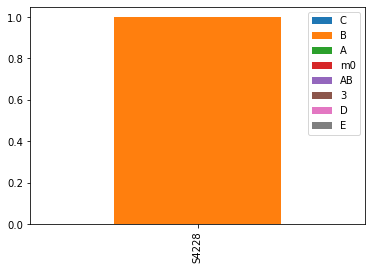

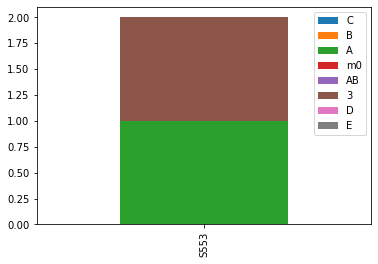

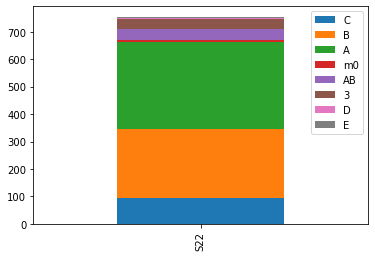

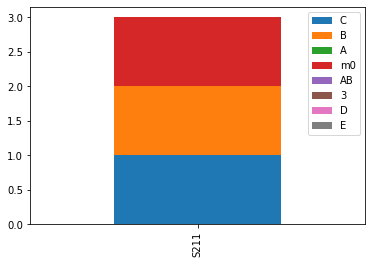

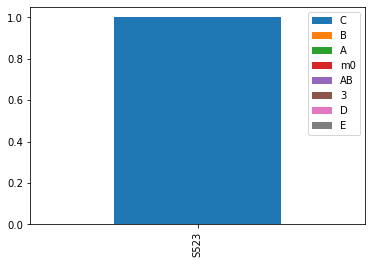

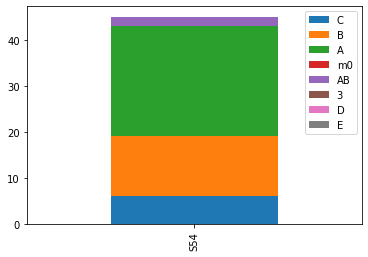

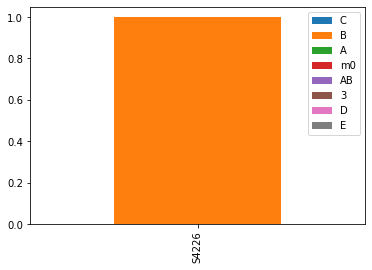

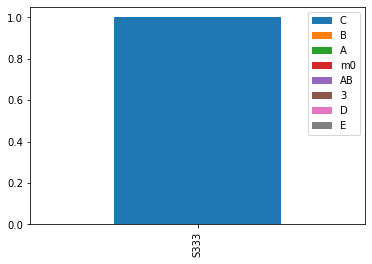

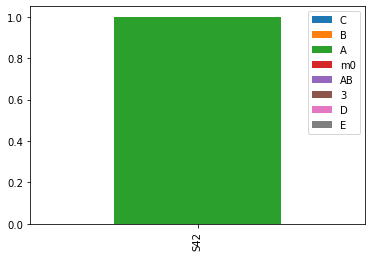

In [33]:
df_typologie_final.groupby(typelist).plot.bar(stacked=True) #Individuellement, c'est parfait, mais je peux pas les combiner..

fig = self.plt.figure(figsize=self.figsize)
plt.savefig('individual_stackbars.png')
